## Curriculum


Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank
Data Dictionary:
* CLIENTNUM: Client number. Unique identifier for the customer holding the account 
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0 
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents 
* Education_Level: Educational Qualification of the account holder 
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

Best Practices for Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 

Submission Guidelines :

There are two parts to the submission: 
A well commented Jupyter notebook [format - .ipynb and .html]


Scoring guide (Rubric) - CreditCard Users Churn Prediction
Criteria	Points
Perform an Exploratory Data Analysis on the data

I) 6 points - Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive

II) 5 points
Illustrate the insights based on EDA
Key meaningful observations on the relationship between variables

III) 6 points 
Data Pre-processing
Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling

IV) 6 points 
Model building - Logistic Regression
- Make a logistic regression model - Improve model performance by up and downsampling the data - Regularize above models, if required

V)9 points
Model building - Bagging and Boosting
- Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models


VI) 9 points 
Hyperparameter tuning using grid search
- Tune all the models using grid search - Use pipelines in hyperparameter tuning

VII) 9 points 
Hyperparameter tuning using random search
- Tune all the models using ramdonized search - Use pipelines in hyperparameter tuning

VIII) 5 points
Model Performances
- Compare the model performance of all the models - Comment on the time taken by the grid and randomized search in optimization

IX) 5 points 
Actionable Insights & Recommendations
- Business recommendations and insights


## Importing Libraries and loading the data

In [1]:
#Preliminary- Import the datasets and libraries and read the csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#remove the warnings
import warnings
warnings.filterwarnings('ignore')


# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

#read dataset
data=pd.read_csv("/Users/aurelienvallier/Desktop/AI & Machine Learning/4- Model Tuning/BankChurners.csv")
data



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,NaN
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,NaN
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,NaN
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,NaN


## Overview of the dataset

In [2]:
data.shape 

(10127, 22)

In [3]:
#Conclusion: Relatively big dataset

In [4]:
#Missing Value

In [5]:
# number of missing values in each column
data.isnull().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

In [6]:
data.isnull().values.any() # there are no missing value

True

In [7]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
# We see 6 categorical variables: Attrition Flag, Gender, Education Level, Marital Status Card and Income Category. 

In [10]:
#Making a list of all categorical variables 
cat_col=['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
------------------------------------------

- Slightly more ladies than men!
- Lot of Unknown when it comes to education
- Evenly split Married/Non Married
- Income split seems quite well spread. Very high income outliers neutralised by the categorization
- Overwhelming majority of the cards are blue, few silver, gold and a handful of platinum.

In [11]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [13]:
# Number of unique in each columnn?
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
Unnamed: 21                     0
dtype: int64

In [14]:
# Dropping columns - ID
data.drop(columns=["CLIENTNUM"], inplace=True)

**Summary of the data**

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


- Clients age range from 26 to 73 year old, mean of 46 seems to indicate close to normal distribution
- Have between 1 to 5 dependent (no one has 0 dependent), average 2.35 seems also quite normal distribution
- Clients have all quite some relationship with the bank, on average 36 months (min is 13 months, hence no new clients)
- All clients seems quite active as average inactivity is only 2.34 months out of last 12 and max inactivity is 6 months and average number of products is quite high (3.8 products).
- Average credit limit of 8.6K is high compared to the 50% percentile (4.5k) indicating that the clients having low credit limits seems to distort the average versus the median (right skew).
- The sum of " Total revolving balance"  and " average open to buy"  seems in fact equal to the credit limit, indicating that we might be able to drop one of them since one indicate utilisation and the other indicates the unused portion.
- The average amount change q4/q1 is 0.76, which indicates a 24% drop in utilisation of the credit card limit over the year. We note the probable presence of outliers here on the extreme sides (0 and 3.397)
- The total transaction count change q4/q1 (71%) indicates an even higher drop (29%) over the year. Similarly we note outliers on both extreme side of the spectrum.
- Average utilisation ratio is 27.5%, quite far from the 50% mark, so outliers are also probably playing here. 

## Univariate Analysis

In [16]:
#Lets use a function to visualize 
def histogram_boxplot(feature, figsize=(15,15), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

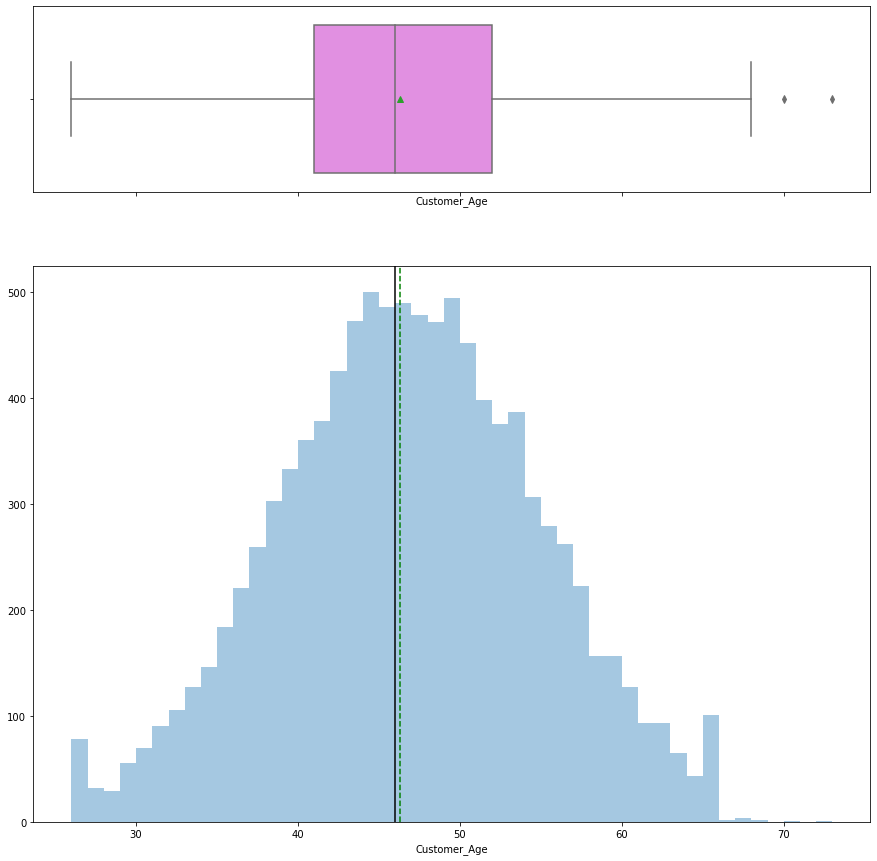

In [17]:
histogram_boxplot(data['Customer_Age'])

Confirm first impression: age is normally distributed, Few outliers

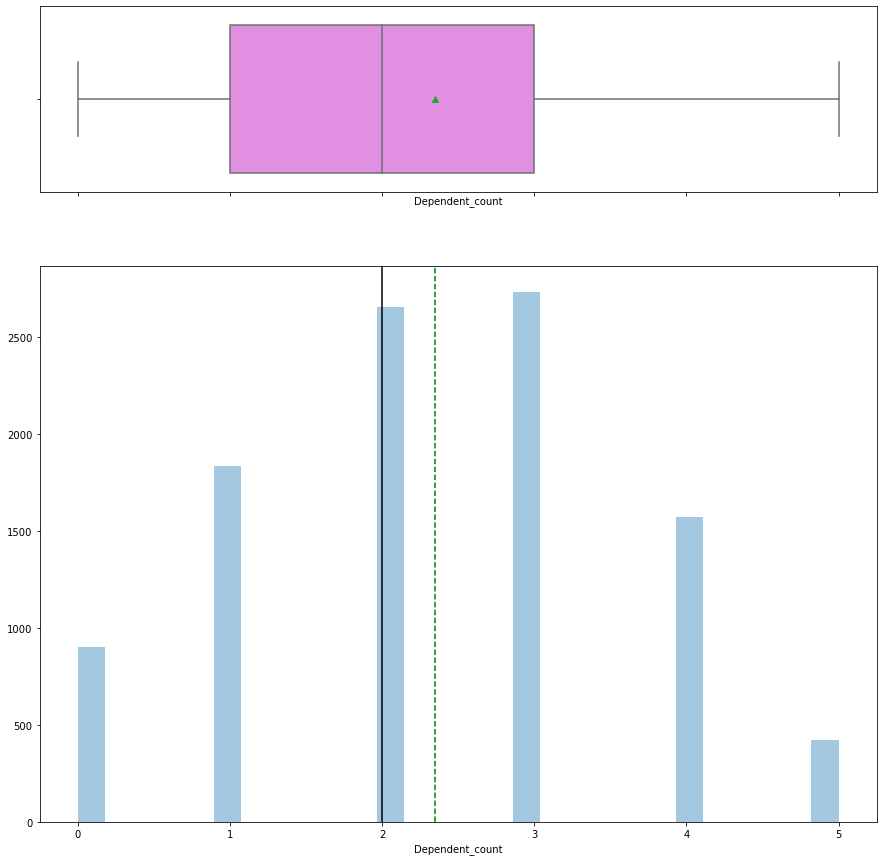

In [18]:
histogram_boxplot(data['Dependent_count'])

Dependant count is slightly skewed to the right, indicating the most of the customers have multiple dependants

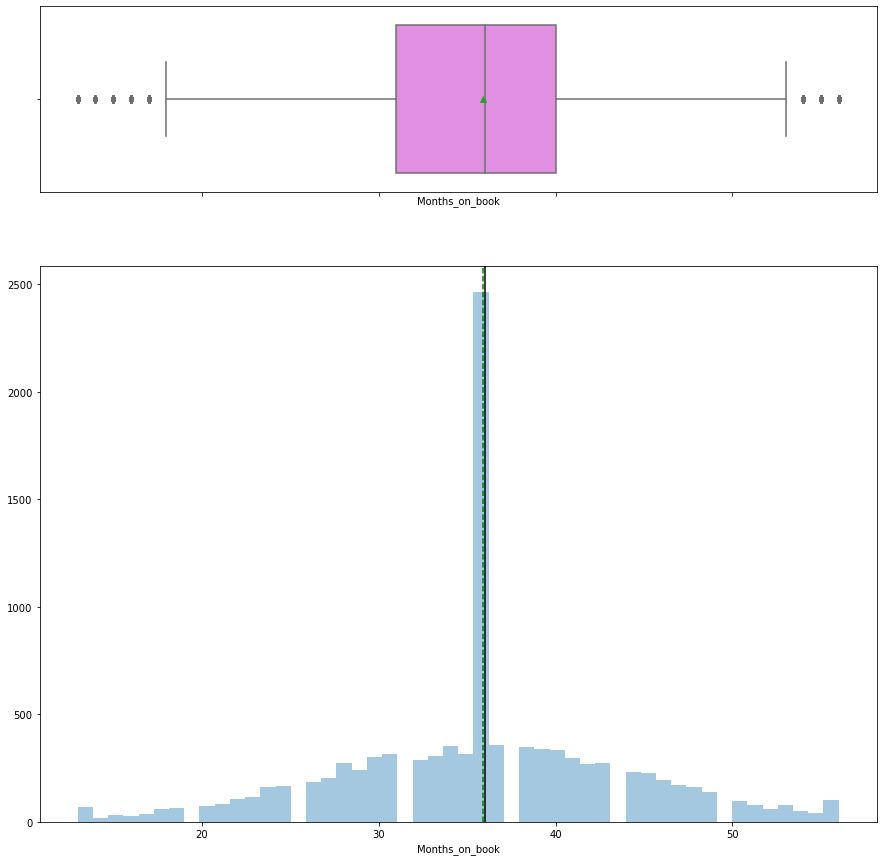

In [19]:
histogram_boxplot(data['Months_on_book'])

Length of relationship with bank is normally distributed, most of the customers have quite some relationship with the bank, no really new customers, a mature clientele so to speak

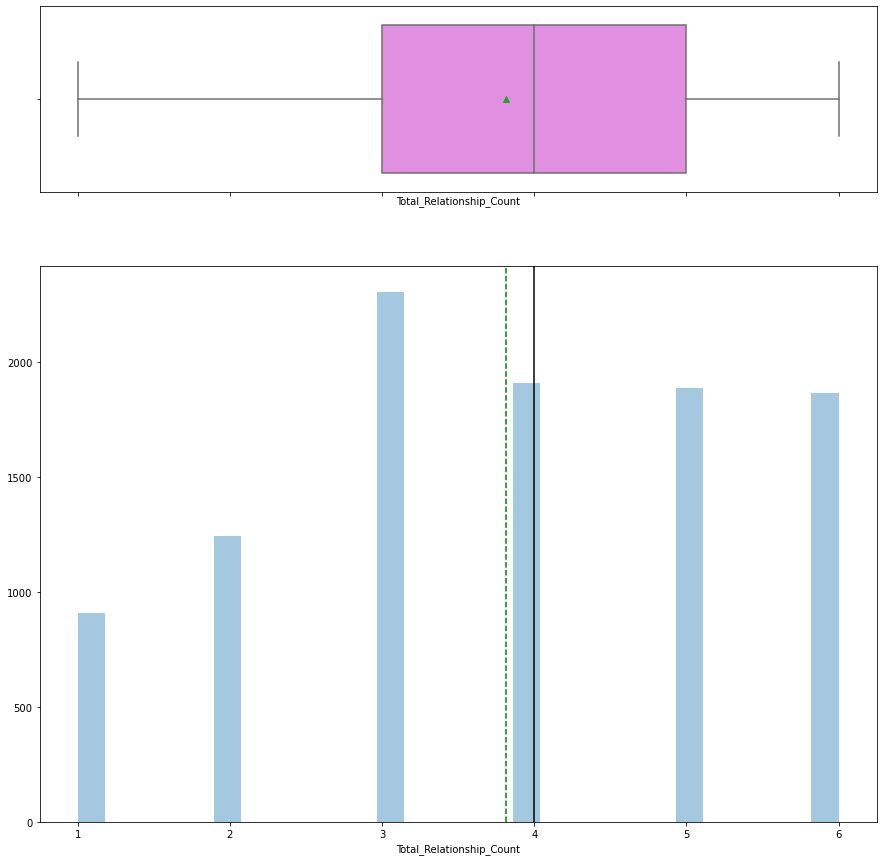

In [20]:
histogram_boxplot(data['Total_Relationship_Count'])

Interesting to see that most of the clients have multiple products with the bank, over 3 in majority.

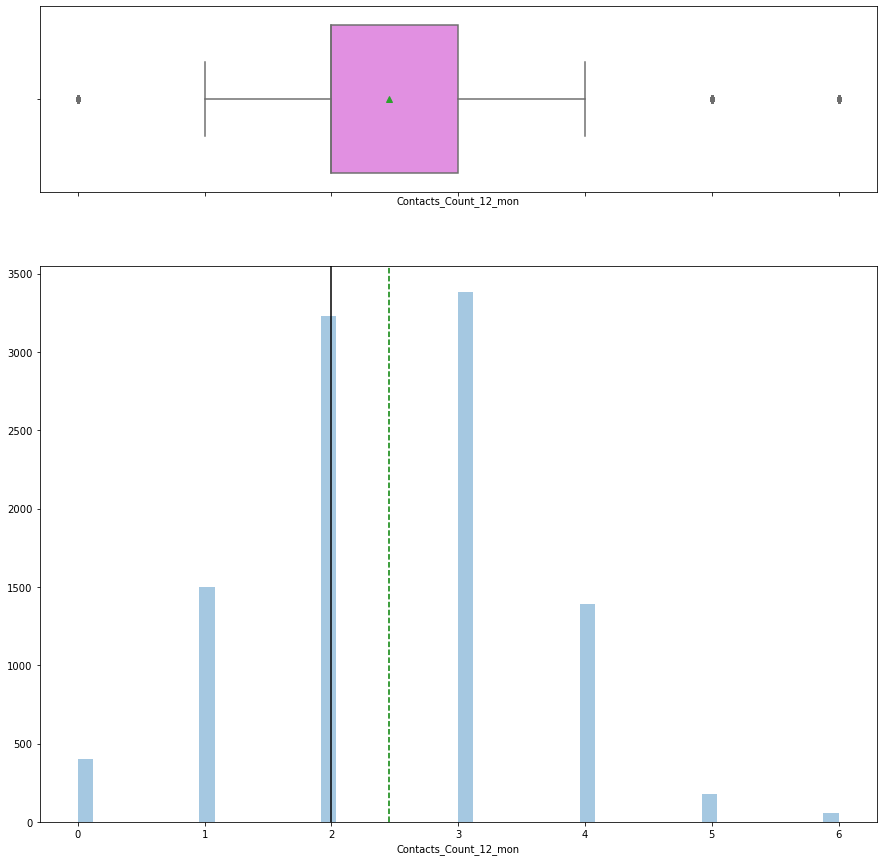

In [21]:
histogram_boxplot(data['Contacts_Count_12_mon'])

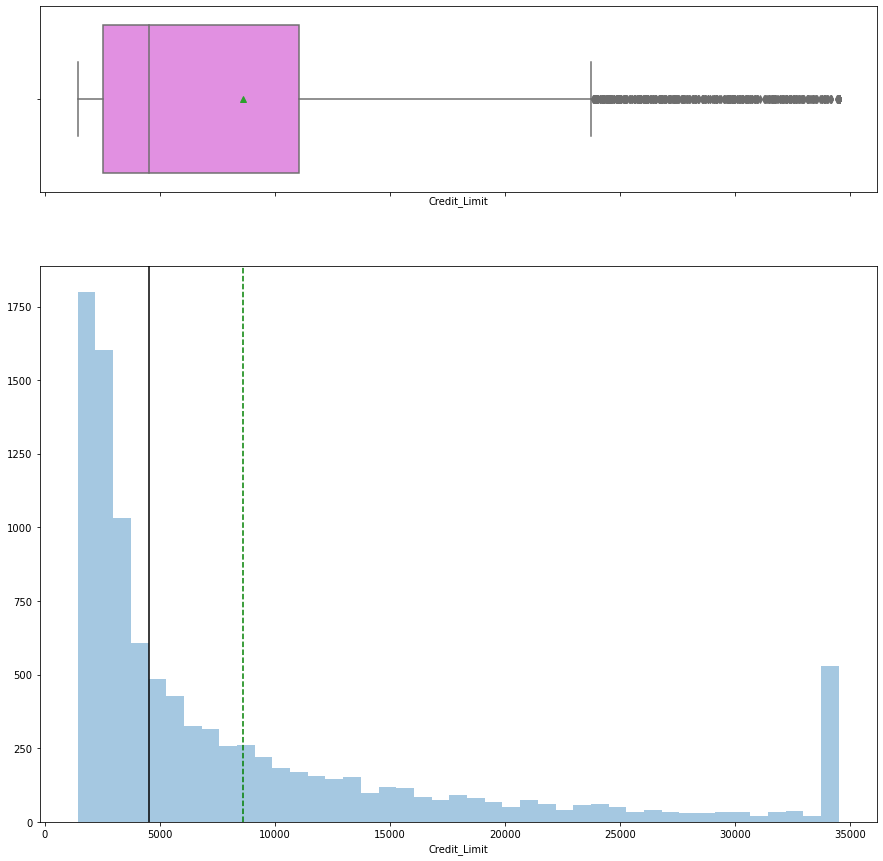

In [22]:
histogram_boxplot(data['Credit_Limit'])

Credit limit is extremely right skewed, indicating that the credit limits provided are mostly focused on the small side

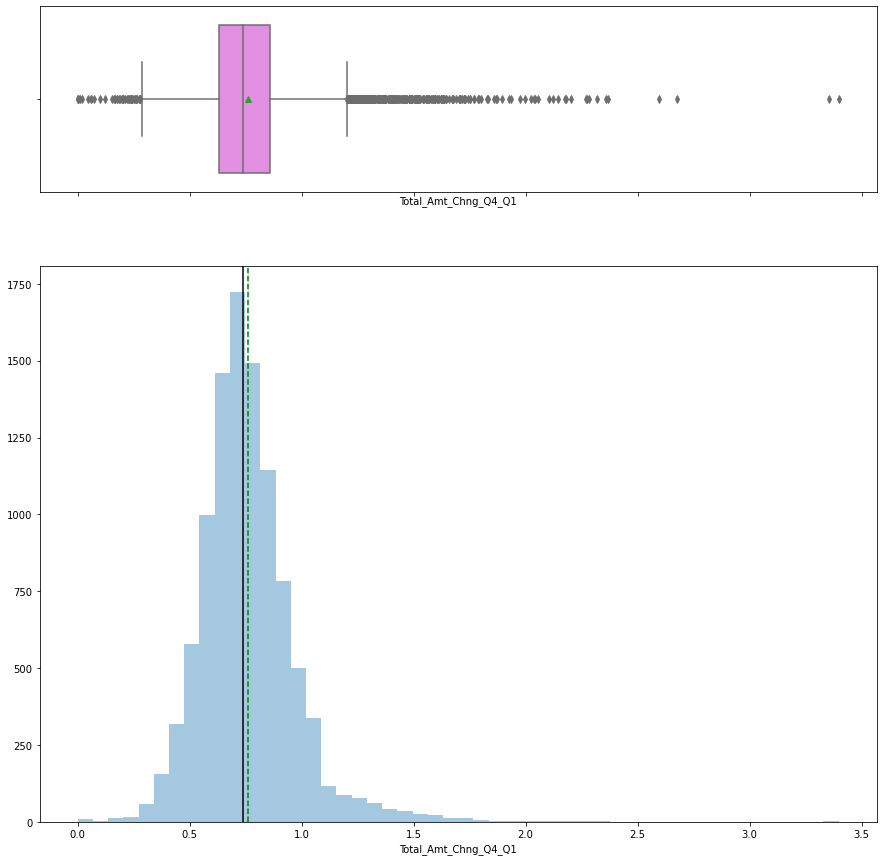

In [23]:
histogram_boxplot(data['Total_Amt_Chng_Q4_Q1'])

- Interesting to see the number of clients showing a drop of credit card utilisation slightly outnumber the one who increased it (slight right skewness)
- Interesting to notice the extremely high number of outliers.


In [24]:
#Let's define a function to create barplots for the categorical variables indicating percentage of each category for that variables.**
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(10,5)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot
    
    #Category: 'Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'

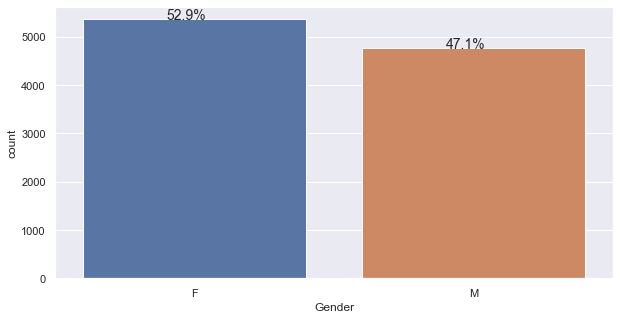

In [25]:
perc_on_bar(data.Gender)

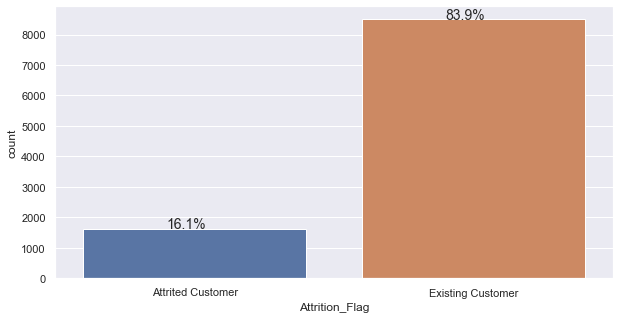

In [26]:
perc_on_bar(data.Attrition_Flag)

16% of attrited customer

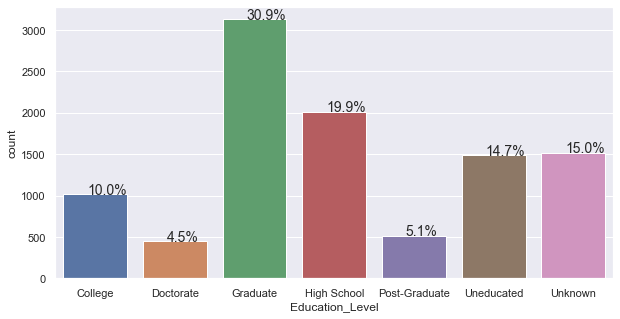

In [27]:
perc_on_bar(data.Education_Level)

We note 15% is unknown but overall, main pattern is about same proportion of up to high school educated as highly educated (graduate to Doctorate): 
35% of uneducated or high school educated, 10% of colleage educated, almost 40% of graduate or higher (post graduate and doctorate).



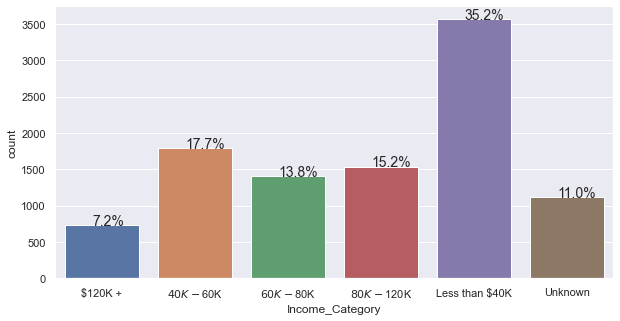

In [28]:
perc_on_bar(data.Income_Category)

We note 11% if unknown
On the lower revenue side we note roughly one third of the clients make less than 40K
On the medium revenue side, roughly 30% make between 40 to 80k
On the higher revenue side, almost a quarter of all clients make above 80k.
So overall fairly evenly spread distribution of revenues, with roughly same proportion of low, medium and high revenues.

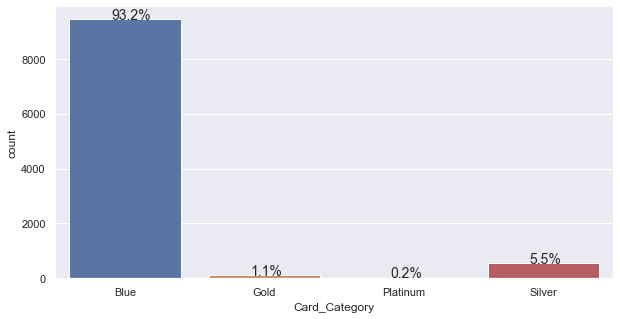

In [29]:
perc_on_bar(data.Card_Category)

This shows clearly an extremely one sided distribution with overwhelming majority of Blue cards holder (93%), drwarfing any other categories. Gold and Platinum makes only 1.3% combined and Silver is a mere 5.5%.

## Bivariate Analysis

Our objective is to find client churning their cc service, i.e. the target variables is being attritted customer or not.


In [30]:
#Drop unnecessary column
data.drop(["Unnamed: 21"], axis=1, inplace=True)

#Let transform the categorical data attrition flag to numerical value 1 or 0.
 1=closed=attritted
 0=open=existing
df_dummies= pd.get_dummies(data, columns=['Attrition_Flag'])
pd.set_option('max_columns', None)
replaceStruct = {"Attrition_Flag":     {"Attrited Customer": 1, "Existing Customer": 0}}
oneHotCols=["Attrition_Flag"]
df_dummies=df_dummies.replace(replaceStruct)
df_dummies.drop(["Unnamed: 21"], axis=1, inplace=True)#we also drop customer id which does not add value
dataclean=df_dummies
dataclean

In [31]:
#sns.pairplot(data=data,hue='Attrition_Flag')

Pairplot does not help a lot here as there is a lot of overlap

In [32]:
### Lets use a function to see how each variable plays with the target variable (change of credit card utilisation during the year)

def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Attrition_Flag'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,data['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

In [33]:
#Target vs customer age

Attrition_Flag  Attrited Customer  Existing Customer    All
Customer_Age                                               
26                              6                 72     78
27                              3                 29     32
28                              1                 28     29
29                              7                 49     56
30                             15                 55     70
31                             13                 78     91
32                             17                 89    106
33                             20                107    127
34                             19                127    146
35                             21                163    184
36                             24                197    221
37                             37                223    260
38                             47                256    303
39                             48                285    333
40                             64       

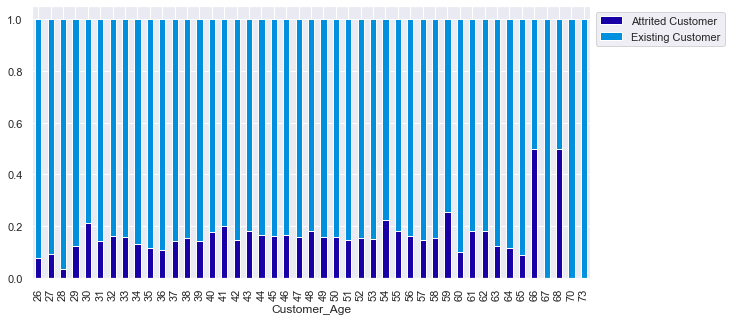

In [34]:
stacked_plot(data.Customer_Age)

Proportion of attrited customers is spread evenly across the age sprectum although we see some higher proportion of attritted customer on the extreme right (with older customers). This may also be due to the small sample of older customers.


In [35]:
#Target vs gender


Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


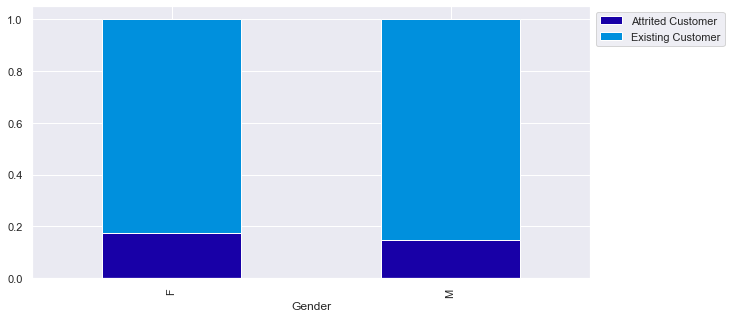

In [36]:
stacked_plot(data.Gender)

In [37]:
#Target vs Marital_Status

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


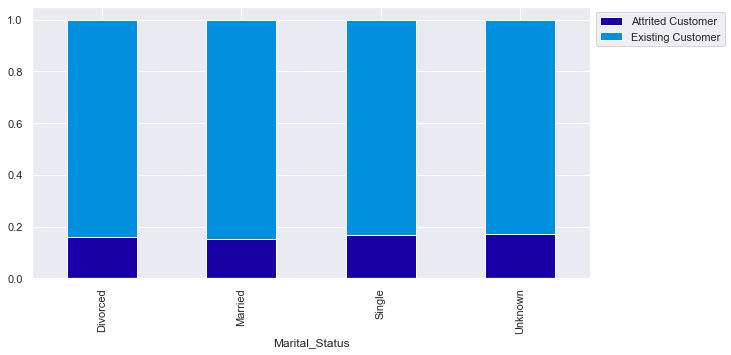

In [38]:
stacked_plot(data.Marital_Status)

No significant proportion difference accross the marital status

In [39]:
#Target vs Income Category

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


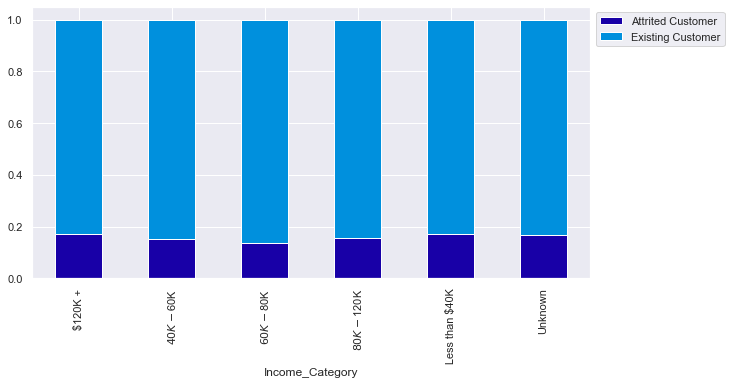

In [40]:
stacked_plot(data.Income_Category)

No huge differences between revenues categories although higher rate of attrition seems to be for extreme categories of the sprectrum

In [41]:
#Target vs Card_Category 

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


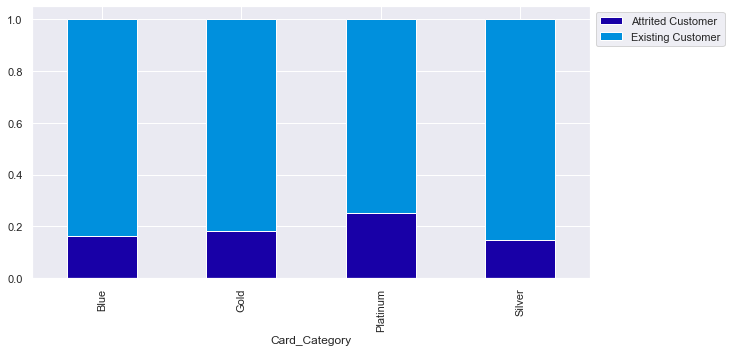

In [42]:
stacked_plot(data.Card_Category)

Some differences with higher tiers having higher attrition although the very small sample of cards which are 
not blue makes this analysis very shallow.

In [43]:
#Target vs Number of Contacts

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


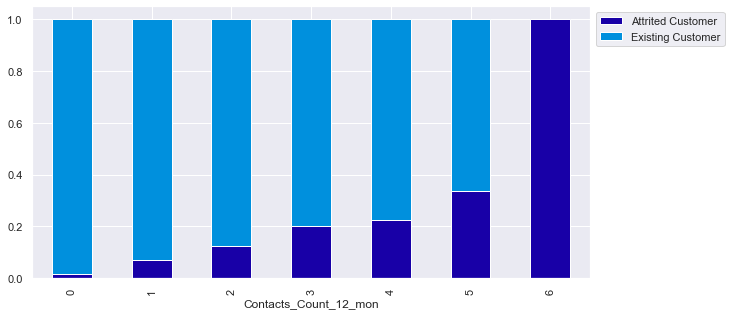

In [44]:
stacked_plot(data.Contacts_Count_12_mon)

The more contacts, the higher attrition rate, but this is probably caused because the bank contact the client to inform him about that...

In [45]:
#Target vs Length of the bank's relationship

Attrition_Flag  Attrited Customer  Existing Customer    All
Months_on_book                                             
13                              7                 63     70
14                              1                 15     16
15                              9                 25     34
16                              3                 26     29
17                              4                 35     39
18                             13                 45     58
19                              6                 57     63
20                             13                 61     74
21                             10                 73     83
22                             20                 85    105
23                             12                104    116
24                             28                132    160
25                             31                134    165
26                             24                162    186
27                             23       

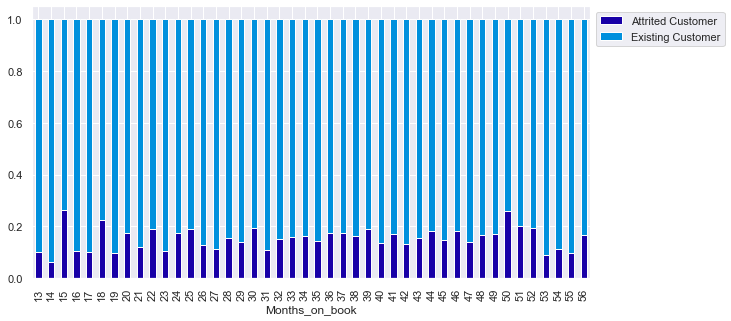

In [46]:
stacked_plot(data.Months_on_book)

Seems pretty evenly spread not showing particular pattern of transactions evolution vs length of the relationship

In [47]:
#Target vs number of products (Total_Relationship_Count)

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


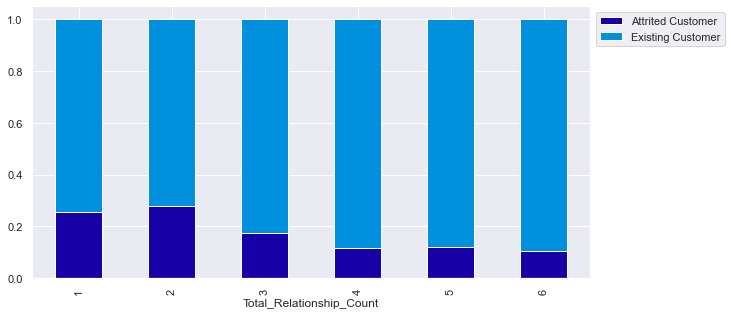

In [48]:
stacked_plot(data.Total_Relationship_Count)

The higher the number of products, the less the attrition rate

# To have more meaningul bivariate analysis, we convert the categorical data to integer and the target variable to 0 and 1

In [267]:
#Converting the categorical data to float
cat_col=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
data2=pd.get_dummies(data, columns=cat_col)
data2.T
#Converting Attrition Flag to 1 and 0
replaceStruct = {"Attrition_Flag":     {"Existing Customer": 0, "Attrited Customer": 1}}
data3=data2.replace(replaceStruct)
data3

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,0,1,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,...,1,0,1,0,0,0,1,0,0,0
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,...,0,0,1,0,0,0,1,0,0,0
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,...,0,0,0,0,0,1,1,0,0,0
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,...,0,0,1,0,0,0,1,0,0,0


In [268]:
#Heatmap

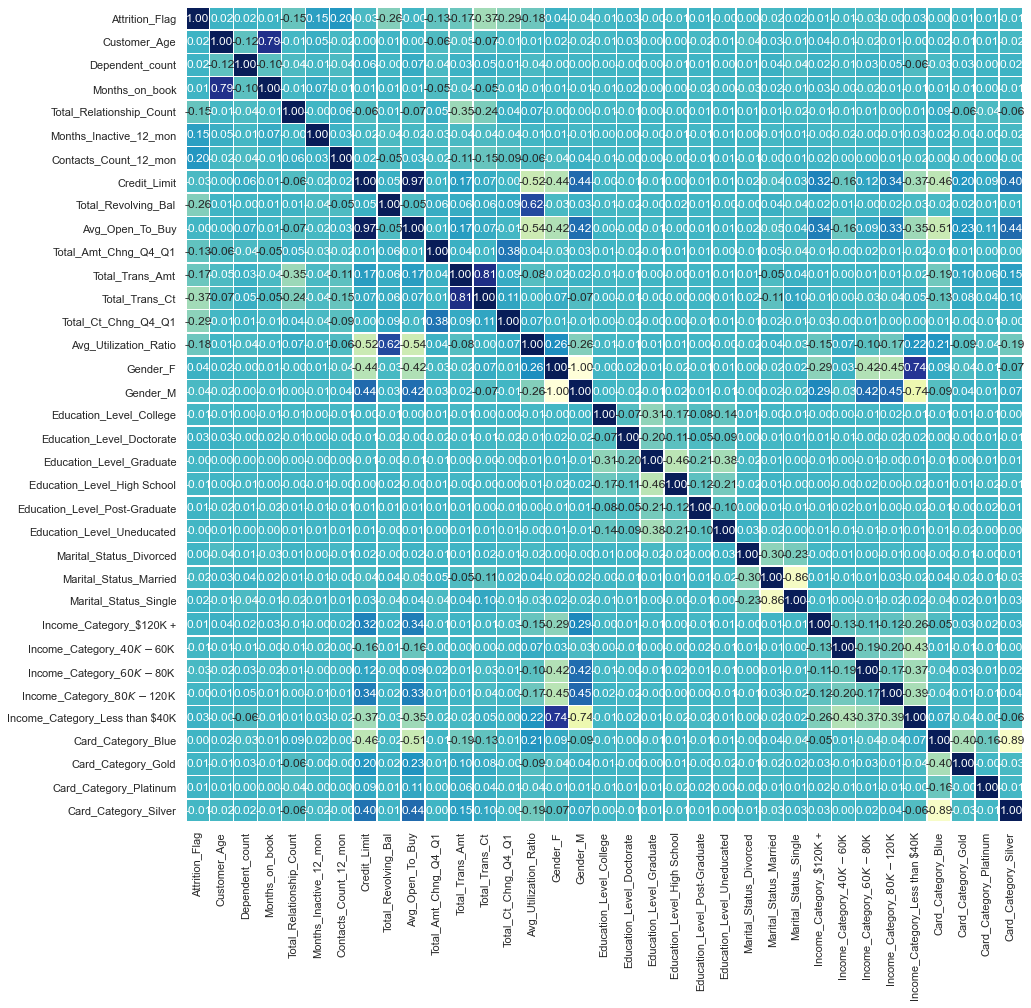

In [272]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(data3.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            fmt='0.2f')
plt.show()

Relatively low correlation in general among the variables.
Target variable attrition flag has correlation (negative or positive) with the following variable:
- total transaction counts (-.37)
- total counts change (-.29)
- total revolving balance (-.26)
- average utilisation ratio (-.18)

Those variables are thus likely to be the most influential into having an attrited customer or not. 

We also note that some correlations are self explanatory and logical, for instance:
- customer age has strong correlation with months on book (length of the banking relationship) which is logical
- Total revolving balance (amount of outstanding in the cc) has correlation with average utilisation ratio

## Illustrate the insights based on EDA
## Key meaningful observations on the relationship between variables

The below variables have the most correlation into our target variable, i.e. in having an attrited customer or not: 
- total transaction counts (-.37)
- total counts change (-.29)
- total revolving balance (-.26)
- average utilisation ratio (-.18)

Other meaningful insights from the EDA are:

- dataset is quite evenly spread in terms of client gender, age, relationship with the bank etc.
- the more products with the Bank the client has, the less likely it is to churn/get attrited
- product wise, the distribution seems extremely focused on lowest level card, the blue card, questioning the 
actual credit card offering (and associated benefits).
- clients with higher quality credit card seems to churn more, which means that the benefits offered by those cards and the cost of holding those cards can be questioned.
- attrition rate seems higher on the extreme sides of the income brackets
- contacting client does not help with reducing churning




## Data Preprocessing

In [51]:
#Missing value Treatment, 
#Outlier Detection(treat, if needed- why or why not ), 
#Feature Engineering, 
#Prepare data for modeling

## Missing value Treatment
As we have seen above, there is no null value, however a lot of "unknown" element in certain label. We will replace those with median for categorical data and with mean for numerical data.

In [52]:
data = data.replace(['Unknown'],'NaN')
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [53]:
si=SimpleImputer(missing_values='NaN', strategy='most_frequent')

mode_imputed_col=['Marital_Status', "Education_Level", "Income_Category"]

#Fit and transform the data
data[mode_imputed_col]=si.fit_transform(data[mode_imputed_col])


## Feature Engineering

In [54]:
# To reduce the calculation time, we propose to 1- round up the labels which are using ratio and 
# and 2) to bin them in order to reduce the number 
#of unique values
datarounded = data.round({'Total_Ct_Chng_Q4_Q1': 1, "Total_Amt_Chng_Q4_Q1": 1, "Avg_Utilization_Ratio":1})
datarounded

bins = [0, .8, 1.2, 3.7]
datarounded['Binned_CC_transaction_count_change Q4/Q1'] = pd.cut(datarounded['Total_Ct_Chng_Q4_Q1'], bins)
datarounded

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Binned_CC_transaction_count_change Q4/Q1
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.3,1144,42,1.6,0.1,"(1.2, 3.7]"
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.5,1291,33,3.7,0.1,"(1.2, 3.7]"
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.6,1887,20,2.3,0.0,"(1.2, 3.7]"
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.4,1171,20,2.3,0.8,"(1.2, 3.7]"
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.2,816,28,2.5,0.0,"(1.2, 3.7]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003.0,1851,2152.0,0.7,15476,117,0.9,0.5,"(0.8, 1.2]"
10123,Attrited Customer,41,M,2,Graduate,Divorced,$40K - $60K,Blue,25,4,...,3,4277.0,2186,2091.0,0.8,8764,69,0.7,0.5,"(0.0, 0.8]"
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.8,10291,60,0.8,0.0,"(0.0, 0.8]"
10125,Attrited Customer,30,M,2,Graduate,Married,$40K - $60K,Blue,36,4,...,3,5281.0,0,5281.0,0.5,8395,62,0.7,0.0,"(0.0, 0.8]"


## Split Data

In [56]:
#Separating target variable and other variables
x=data3.drop(columns='Attrition_Flag')
y=data3['Attrition_Flag']
#Splitting the data into train and test sets
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)

In [57]:
#Checking that no column has missing values in train or test sets
print(xtrain.isna().sum())
print('-'*30)
print(xtest.isna().sum())

Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Avg_Open_To_Buy                   0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_F                          0
Gender_M                          0
Education_Level_College           0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Divorced           0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$120K +           0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K 

In [58]:
#Outlier Detection 

- The outliers on the income variable have been neutralised by the binning technic.
- We have seen in the univariate analysis that there are a large number of outliers in the Credit Limit. We propose to correct the replace the outliers of the Credit limit by the upper side of the whisker as they might distort the dataset otherwise

In [59]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Customer_Age                  11.000
Dependent_count                2.000
Months_on_book                 9.000
Total_Relationship_Count       2.000
Months_Inactive_12_mon         1.000
Contacts_Count_12_mon          1.000
Credit_Limit                8512.500
Total_Revolving_Bal         1425.000
Avg_Open_To_Buy             8534.500
Total_Amt_Chng_Q4_Q1           0.228
Total_Trans_Amt             2585.500
Total_Trans_Ct                36.000
Total_Ct_Chng_Q4_Q1            0.236
Avg_Utilization_Ratio          0.480
dtype: float64


In [60]:
#Replace every outlier on the upper side of  by the upper whisker    
data = data.copy()
data_income=data["Credit_Limit"]

Q1= data_income.quantile(0.25)
Q3= data_income.quantile(0.75)
IQR = Q3 - Q1
for i in (np.where(data_income > Q3 + 1.5 * IQR)):
    
    whisker  = Q3 + 1.5 * IQR
data_income.iloc[i] = whisker

data_income.describe()

count    10127.000000
mean      7882.309381
std       7217.091225
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      23836.250000
Name: Credit_Limit, dtype: float64

##  IV) Model building - Logistic Regression
- Make a logistic regression model - Improve model performance by up and downsampling the data - Regularize above models, if required



In [61]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [62]:
# Fit the model on train
logreg = LogisticRegression(solver="liblinear")
logreg.fit(xtrain, ytrain)


LogisticRegression(solver='liblinear')

In [63]:
#Lets add a function to check the various metrics (template taken from Ensemble Hands-On-Bagging)
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    
    #Accuracy of the model
    train_acc = model.score(xtrain,ytrain)
    test_acc = model.score(xtest,ytest)
    
    #Recall of the model
    train_recall = metrics.recall_score(ytrain,pred_train)
    test_recall = metrics.recall_score(ytest,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(ytrain,pred_train)
    test_precision = metrics.precision_score(ytest,pred_test)
        
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(xtrain,ytrain))
        print("Accuracy on test set : ",model.score(xtest,ytest))
        print("Recall on training set : ",metrics.recall_score(ytrain,pred_train))
        print("Recall on test set : ",metrics.recall_score(ytest,pred_test))
        print("Precision on training set : ",metrics.precision_score(ytrain,pred_train))
        print("Precision on test set : ",metrics.precision_score(ytest,pred_test))
    
    return score_list # returning the list with train and test scores

In [64]:
#make confusion matrix. We add the function taken from practice exercise loan delinquent
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(xtest)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [65]:
#Metrics of logreg
logreg_score= get_metrics_score(logreg)

Accuracy on training set :  0.8955981941309256
Accuracy on test set :  0.8923988153998026
Recall on training set :  0.5285338015803336
Recall on test set :  0.5
Precision on training set :  0.7478260869565218
Precision on test set :  0.746177370030581


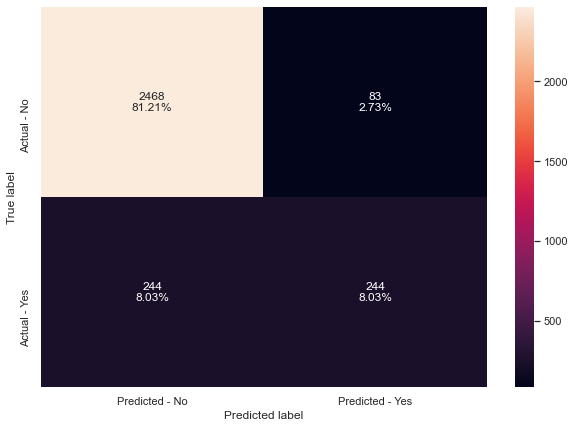

In [66]:
# creating confusion matrix
make_confusion_matrix(logreg,ytest)

The most important metrics is to make sure we dont miss out on predicting the customer who are actually going to churn. So recall is number one important criteria. Making sure we do not chase client who will not churcn is also important to make sure we do not waste money on the chasing. So Precision is number 2 criterias.

Recall of the test set is extremely poor, actually close to no predictive power whatsoever. Lets see if regularizing and up/down sampling can help

## Working on Up-sampling training set using SMOTE

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(ytrain==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(ytrain==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(xtrain, ytrain)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 34)
After UpSampling, the shape of train_y: (11898,) 



In [69]:
#let's use log reg over oversampled data

In [70]:
# Fit the model on train
logreg = LogisticRegression(solver="liblinear")
logreg_over=logreg.fit(X_train_over,y_train_over)

In [71]:
#Metrics of logreg
logreg_score= get_metrics_score(logreg_over)

Accuracy on training set :  0.8922121896162528
Accuracy on test set :  0.8874629812438302
Recall on training set :  0.6145741878841089
Recall on test set :  0.5901639344262295
Precision on training set :  0.6829268292682927
Precision on test set :  0.6697674418604651


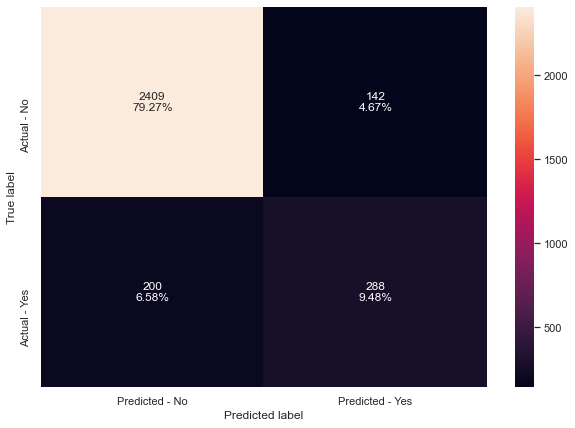

In [72]:
# creating confusion matrix
make_confusion_matrix(logreg_over,ytest)

The actual predicted have increased slightly from 244 to 288 but the actual no predicted no have decreased.
Recall on test rest remains extremely low (59%) close to non predictive value.

## Let's try regularization over the oversampled data

In [73]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='liblinear')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.30000000000000004, random_state=1, solver='liblinear')

In [74]:
#Metrics of logreg for oversampled
logreg_score= get_metrics_score(lr_estimator)

Accuracy on training set :  0.8971501128668171
Accuracy on test set :  0.8943731490621916
Recall on training set :  0.6215978928884986
Recall on test set :  0.6004098360655737
Precision on training set :  0.7037773359840954
Precision on test set :  0.6992840095465394


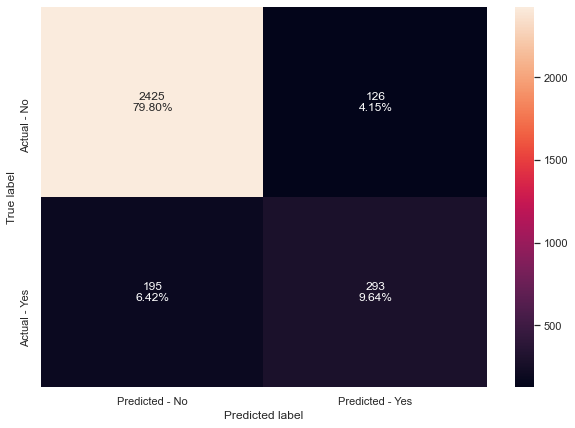

In [75]:
# creating confusion matrix for oversampled
make_confusion_matrix(lr_estimator,ytest)

The actual predicted have increased further from 288 to 293 but recall on test rest remains extremely low (60%) close to non predictive value.

## Working on Down-sampling train data using SMOTE

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(xtrain, ytrain)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(ytrain==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(ytrain==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

In [ ]:
#let's use log reg over undersampled data

In [ ]:
# Fit the model on train
logreg = LogisticRegression(solver="liblinear")
logreg_under=logreg.fit(X_train_un,y_train_un)

In [ ]:
# Metrics for undersampled
logreg_score= get_metrics_score(logreg_under)

In [ ]:
# creating confusion matrix for undersampled
make_confusion_matrix(logreg,ytest)

Recall improved significantly on test set to 84.4%, number of actual yes predicted yest increased to 414.

## V) Model building - 
- Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models



In [ ]:
# Import the various models

In [ ]:
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier



In [ ]:
#Build models

In [107]:
#Build Decision tree
decisiontree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
parameters_dt = {
        'decisiontreeclassifier__max_depth': np.arange(1,10), 
'decisiontreeclassifier__min_samples_split': [1,10,40],
'decisiontreeclassifier__max_leaf_nodes' : [10,20,30],
             'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }
decisiontree.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [ ]:
#Build Bagging classifier
bagging=BaggingClassifier(random_state=1)
parameters_bag = {
    
'baggingclassifier__max_samples': [0.7,0.9,1], 
'baggingclassifier__max_features': [0.7,0.9,1],
    'baggingclassifier__n_estimators' : [10,20,50],
}
bagging.fit(xtrain,ytrain)

In [ ]:
#Build Random Forest classifier
                  
randomforest = RandomForestClassifier(random_state=1)
parameters_rf = {
           'randomforestclassifier__n_estimators': [150,200,250],
'randomforestclassifier__min_samples_leaf': np.arange(3, 10),
'randomforestclassifier__max_features': np.arange(3, 10, 1),
'randomforestclassifier__max_samples': np.arange(0.3, 0.7, 0.1),
    }
randomforest.fit(xtrain,ytrain)

In [134]:
#adaboost
adaboost = AdaBoostClassifier(random_state=1)
parameters_ab = {'adaboostclassifier__n_estimators': np.arange(10,100,10),
              'adaboostclassifier__learning_rate': [1, 0.1, 0.5],
              }
adaboost.fit(xtrain,ytrain)


AdaBoostClassifier(random_state=1)

In [ ]:
#gradient boost
gradientboost=GradientBoostingClassifier(random_state=1)
parameters_gb = {
    
    
'gradientboostingclassifier__n_estimators': np.arange(50,200,25), 
           'gradientboostingclassifier__subsample':[0.7,0.8,1],
           'gradientboostingclassifier__max_features':[0.7,0.8,1],
'gradientboostingclassifier__max_depth' :[3,5,10]
              }
gradientboost.fit(xtrain, ytrain)


In [ ]:

#xgb boost
xgboost=XGBClassifier (random_state=1)
parameters_xb = {
    
    
'xgbclassifier__n_estimators': [100,150], 
  'xgbclassifier__subsample':[0.7, 0.9, 1],
'xgbclassifier__gamma':[0, 1, 3],
'xgbclassifier__colsample_bytree':[0.7, 0.9, 1],
'xgbclassifier__colsample_bylevel':[0.7, 0.9, 1]
              }

xgboost.fit(xtrain, ytrain)

## VI) Hyperparameter tuning using grid search
- Tune all the models using grid search - Use pipelines in hyperparameter tuning

## Pipeline building 

In [ ]:
#import 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline, make_pipeline

pipe_decisiontree = make_pipeline(StandardScaler(), decisiontree)
pipe_bagging = make_pipeline(StandardScaler(), bagging)
pipe_randomforest = make_pipeline(StandardScaler(), randomforest)
pipe_adaboost = make_pipeline(StandardScaler(), adaboost)
pipe_gradientboost = make_pipeline(StandardScaler(), gradientboost)
pipe_xgboost = make_pipeline(StandardScaler(), xgboost)

## Grid Search scoring

In [92]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search






# Grid Search Decision Tree

In [219]:
grid_dt= GridSearchCV(pipe_decisiontree, parameters_dt, scoring='recall')

In [220]:
# Fitting parameters in GridSeachCV
dt_tuned_grid=grid_dt.fit(xtrain, ytrain)

# Set the algo to the best combination of parameters
dt_grid_tuned = dt_tuned_grid.best_estimator_

#Fit the algorithm with the best combination to the data
dt_grid_tuned.fit(xtrain, ytrain)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=7, max_leaf_nodes=30,
                                        min_impurity_decrease=0.001,
                                        min_samples_split=40,
                                        random_state=1))])

In [221]:
# Get metrics best estimator decision tree
dt_grid_tuned_score= get_metrics_score(dt_grid_tuned)

Accuracy on training set :  0.9544300225733634
Accuracy on test set :  0.9437314906219151
Recall on training set :  0.8059701492537313
Recall on test set :  0.8032786885245902
Precision on training set :  0.9
Precision on test set :  0.8394004282655246


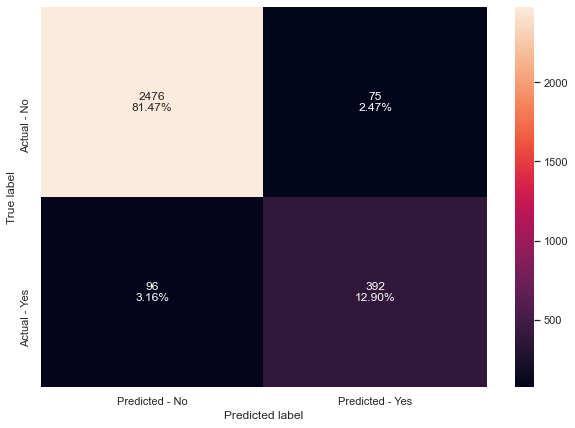

In [222]:
#Confusion matrix best estimator decision tree
make_confusion_matrix(dt_grid_tuned,ytest)

Good improvement of recall on test data to 80%

# Grid Search Bagging


In [223]:
grid_bagging= GridSearchCV(pipe_bagging, parameters_bag, scoring='recall')

In [224]:
# Fitting parameters in GridSeachCV
bagging_tuned_grid= grid_bagging.fit(xtrain, ytrain)

# Set the algo to the best combination of parameters
bagging_grid_tuned = bagging_tuned_grid.best_estimator_

#Fit the algorithm with the best combination to the data
bagging_grid_tuned.fit(xtrain, ytrain)





Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.9,
                                   n_estimators=50, random_state=1))])

In [225]:
# Get metrics best estimator bagging
bagging_grid_tuned_score= get_metrics_score(bagging_grid_tuned)

Accuracy on training set :  0.9995767494356659
Accuracy on test set :  0.9654491609081934
Recall on training set :  0.9973661106233538
Recall on test set :  0.8709016393442623
Precision on training set :  1.0
Precision on test set :  0.9100642398286938


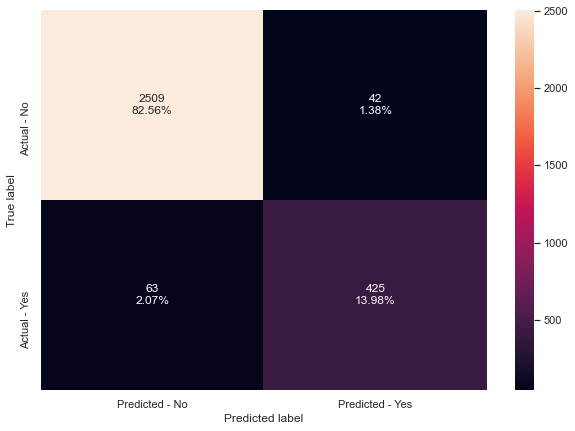

In [226]:
#Confusion matrix best estimator bagging
make_confusion_matrix(bagging_grid_tuned,ytest)

Recall is 87% on test set, which is a nice improvement brought by grid search tuning!

# Grid Search Random Forest

In [227]:
grid_rf= GridSearchCV(pipe_randomforest, parameters_rf, scoring='recall')

In [228]:
randomforest_tuned_grid= grid_rf.fit(xtrain, ytrain)

# Set the algo to the best combination of parameters
randomforest_grid_tuned = randomforest_tuned_grid.best_estimator_

#Fit the algorithm with the best combination to the data
randomforest_grid_tuned.fit(xtrain, ytrain)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=9,
                                        max_samples=0.6000000000000001,
                                        min_samples_leaf=3, n_estimators=250,
                                        random_state=1))])

In [229]:
# Get metrics best estimator random forest
randomforest_grid_tuned_score= get_metrics_score(randomforest_grid_tuned)

Accuracy on training set :  0.9830699774266366
Accuracy on test set :  0.9572227706482396
Recall on training set :  0.9157155399473222
Recall on test set :  0.8094262295081968
Precision on training set :  0.9775070290534208
Precision on test set :  0.9143518518518519


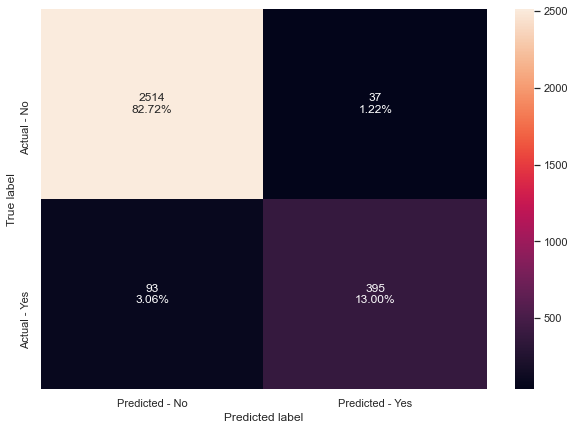

In [230]:
#Confusion matrix best estimator random forest
make_confusion_matrix(randomforest_grid_tuned,ytest)

In [ ]:
Very high score on rtaining set suggest possib

# Grid Search Adaboost

In [243]:
grid_adaboost= GridSearchCV(pipe_adaboost, parameters_ab, scoring='recall')

In [244]:
adaboost_tuned_grid= grid_adaboost.fit(xtrain, ytrain)


# Set the algo to the best combination of parameters
adaboost_grid_tuned = adaboost_tuned_grid.best_estimator_

#Fit the algorithm with the best combination to the data
adaboost_grid_tuned.fit(xtrain, ytrain)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=1, n_estimators=90,
                                    random_state=1))])

In [245]:
# Get metrics best estimator adaboost
adaboost_grid_tuned_score= get_metrics_score(adaboost_grid_tuned)

Accuracy on training set :  0.9645880361173815
Accuracy on test set :  0.9634748272458046
Recall on training set :  0.8647936786654961
Recall on test set :  0.8770491803278688
Precision on training set :  0.910351201478743
Precision on test set :  0.8935281837160751


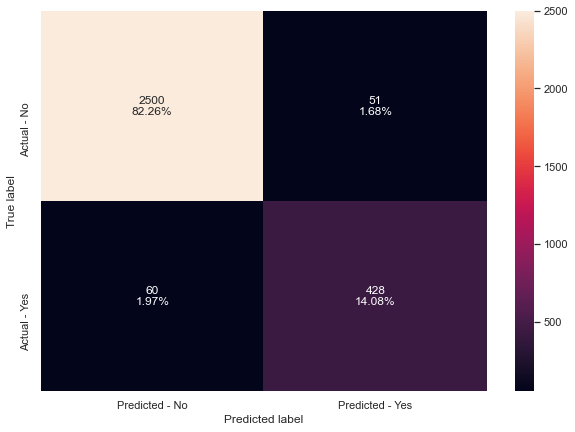

In [246]:
#Confusion matrix best estimator ada boost
make_confusion_matrix(adaboost_grid_tuned,ytest)

Good results on test set with recall of 87.7%. Some overfit possible

# Grid Search GradientBoost

In [231]:
grid_gradientboost= GridSearchCV(pipe_gradientboost, parameters_gb, scoring='recall')

In [232]:
gradientboost_tuned_grid= grid_gradientboost.fit(xtrain, ytrain)

In [233]:

# Set the algo to the best combination of parameters
gradientboost_grid_tuned = gradientboost_tuned_grid.best_estimator_

#Fit the algorithm with the best combination to the data
gradientboost_grid_tuned.fit(xtrain, ytrain)





Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, max_features=0.8,
                                            n_estimators=150, random_state=1,
                                            subsample=0.7))])

In [234]:
# Get metrics best estimator gradient boost
gradientboost_grid_tuned_score= get_metrics_score(gradientboost_grid_tuned)

Accuracy on training set :  0.9991534988713319
Accuracy on test set :  0.9726883843369529
Recall on training set :  0.9964881474978051
Recall on test set :  0.8934426229508197
Precision on training set :  0.9982409850483729
Precision on test set :  0.9336188436830836


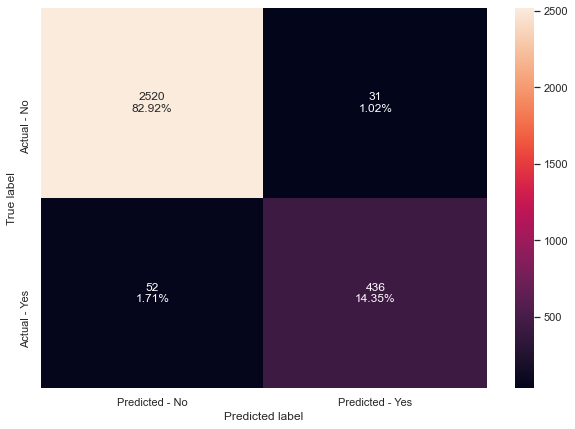

In [235]:
#Confusion matrix best estimator gradient boost
make_confusion_matrix(gradientboost_grid_tuned,ytest)

Extremely strong results on recall on both the training and test set. 

# Grid Search XGBoost

In [236]:
grid_xgboost= GridSearchCV(pipe_xgboost, parameters_xb, scoring='recall')

In [237]:
xgboost_tuned_grid= grid_xgboost.fit(xtrain, ytrain)

[15:22:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [238]:
# Set the algo to the best combination of parameters
xgboost_grid_tuned = xgboost_tuned_grid.best_estimator_

#Fit the algorithm with the best combination to the data
xgboost_grid_tuned.fit(xtrain, ytrain)




[15:29:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.9, colsample_bynode=1,
                               colsample_bytree=0.9, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [239]:
# Get metrics best estimator xg boost
xgboost_grid_tuned_score= get_metrics_score(xgboost_grid_tuned)

Accuracy on training set :  0.9940744920993227
Accuracy on test set :  0.9720302731161566
Recall on training set :  0.9754170324846356
Recall on test set :  0.9036885245901639
Precision on training set :  0.9875555555555555
Precision on test set :  0.9206680584551148


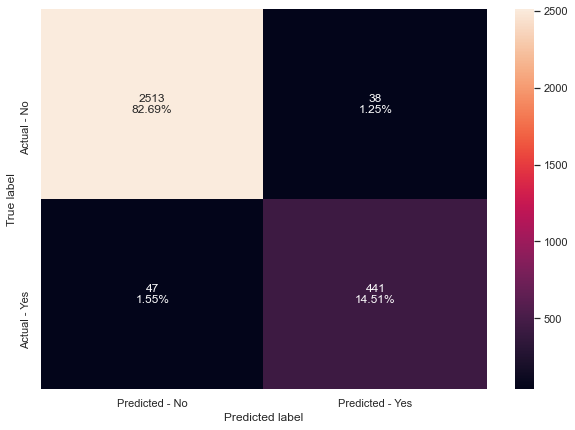

In [240]:
#Confusion matrix best estimator xg boost
make_confusion_matrix(xgboost_grid_tuned,ytest)

Strong results in terms of recall, strong improvement provided by the tuning

## VII) Hyperparameter tuning using random search
- Tune all the models using ramdonized search - Use pipelines in hyperparameter tuning

In [153]:
from sklearn.model_selection import RandomizedSearchCV

In [154]:
# run randomized search
samples = 10  # number of random samples 

# Random Search Decision Tree


In [157]:
random_decisiontree = RandomizedSearchCV(pipe_decisiontree, parameters_dt, n_iter=samples)
random_decisiontree.fit(xtrain, ytrain) 

print("Best parameters are {} with CV score={}:" .format(random_decisiontree.best_params_,random_decisiontree.best_score_))


Best parameters are {'decisiontreeclassifier__min_samples_split': 10, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__max_depth': 8} with CV score=0.9235313088200604:


In [172]:
# Creating new pipeline with best parameters
dt_random_tuned = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1, max_depth=8, min_samples_split=10, 
                           max_leaf_nodes=10, min_impurity_decrease= 0.0001))

# Fit the model on training data
dt_random_tuned.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10,
                                        min_impurity_decrease=0.0001,
                                        min_samples_split=10,
                                        random_state=1))])

Accuracy on training set :  0.9308690744920993
Accuracy on test set :  0.920368542283646
Recall on training set :  0.7541703248463565
Recall on test set :  0.7581967213114754
Precision on training set :  0.80355472404116
Precision on test set :  0.7489878542510121


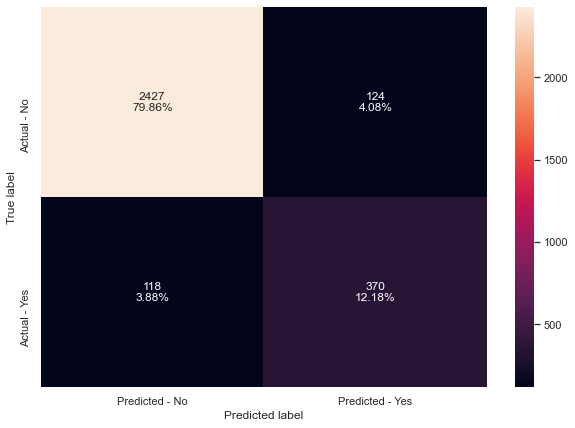

In [164]:
# Calculating different metrics
get_metrics_score(dt_random_tuned)

# Creating confusion matrix
make_confusion_matrix(dt_random_tuned, ytest)

# Random Search Bagging

In [165]:
random_bagging = RandomizedSearchCV(pipe_bagging, parameters_bag, n_iter=samples)
random_bagging.fit(xtrain, ytrain) 

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('baggingclassifier',
                                              BaggingClassifier(random_state=1))]),
                   param_distributions={'baggingclassifier__max_features': [0.7,
                                                                            0.9,
                                                                            1],
                                        'baggingclassifier__max_samples': [0.7,
                                                                           0.9,
                                                                           1],
                                        'baggingclassifier__n_estimators': [10,
                                                                            20,
                                                                            50]

In [166]:
print("Best parameters are {} with CV score={}:" .format(random_bagging.best_params_,random_bagging.best_score_))



Best parameters are {'baggingclassifier__n_estimators': 50, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__max_features': 0.7} with CV score=0.9590843803781007:


In [176]:
# Creating new pipeline with best parameters
bagging_random_tuned = make_pipeline(StandardScaler(),BaggingClassifier(random_state=1, n_estimators=50, max_samples= 0.9, 
                           max_features= 0.7))
# Fit the model on training data
bagging_random_tuned.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.7, max_samples=0.9,
                                   n_estimators=50, random_state=1))])

Accuracy on training set :  0.9997178329571106
Accuracy on test set :  0.9644619940769991
Recall on training set :  0.9982440737489026
Recall on test set :  0.8278688524590164
Precision on training set :  1.0
Precision on test set :  0.9439252336448598


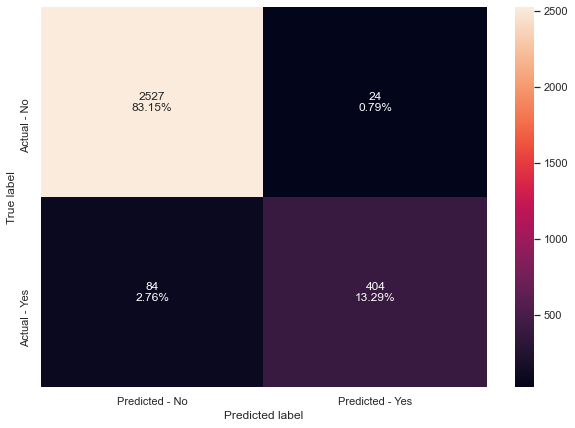

In [177]:
# Calculating different metrics
get_metrics_score(bagging_random_tuned)

# Creating confusion matrix
make_confusion_matrix(bagging_random_tuned, ytest)

Score on training set versus training set suggests some overfit

# random Search Random Forest

In [179]:
random_randomforest = RandomizedSearchCV(pipe_randomforest, parameters_rf, n_iter=samples)
random_randomforest.fit(xtrain, ytrain) 



RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=1))]),
                   param_distributions={'randomforestclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                                        'randomforestclassifier__max_samples': array([0.3, 0.4, 0.5, 0.6]),
                                        'randomforestclassifier__min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'randomforestclassifier__n_estimators': [150,
                                                                                 200,
                                                                                 250]})

In [180]:
print("Best parameters are {} with CV score={}:" .format(random_randomforest.best_params_,random_randomforest.best_score_))




Best parameters are {'randomforestclassifier__n_estimators': 250, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_samples': 0.4, 'randomforestclassifier__max_features': 9} with CV score=0.9449754293273399:


In [181]:
# Creating new pipeline with best parameters
randomforest_random_tuned = make_pipeline(StandardScaler(),RandomForestClassifier
                                          (random_state=1, n_estimators=250, min_samples_leaf=5, 
                           max_samples= 0.4, max_features=9))
# Fit the model on training data
randomforest_random_tuned.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=9, max_samples=0.4,
                                        min_samples_leaf=5, n_estimators=250,
                                        random_state=1))])

Accuracy on training set :  0.967127539503386
Accuracy on test set :  0.9453767686739059
Recall on training set :  0.839332748024583
Recall on test set :  0.7479508196721312
Precision on training set :  0.9502982107355865
Precision on test set :  0.8946078431372549


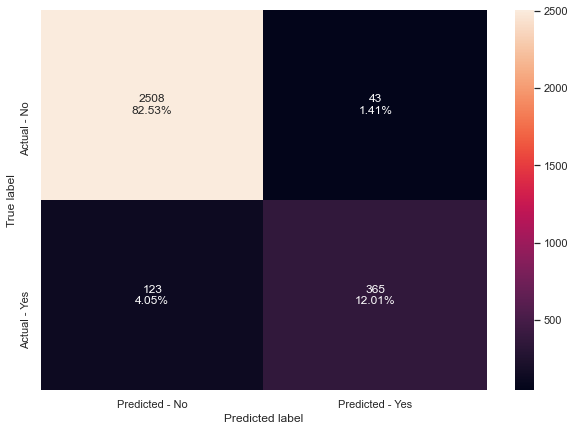

In [182]:
# Calculating different metrics
get_metrics_score(randomforest_random_tuned)

# Creating confusion matrix
make_confusion_matrix(randomforest_random_tuned, ytest)

Some overfit observed

# random Search adaboost

In [184]:
random_adaboost = RandomizedSearchCV(pipe_adaboost, parameters_ab, n_iter=samples)
random_adaboost.fit(xtrain, ytrain) 

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('adaboostclassifier',
                                              AdaBoostClassifier(random_state=1))]),
                   param_distributions={'adaboostclassifier__learning_rate': [1,
                                                                              0.1,
                                                                              0.5],
                                        'adaboostclassifier__n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [185]:
print("Best parameters are {} with CV score={}:" .format(random_adaboost.best_params_,random_adaboost.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 0.5} with CV score=0.9571095691746304:


In [192]:
# Creating new pipeline with best parameters
adaboost_random_tuned = make_pipeline(StandardScaler(),AdaBoostClassifier
                                          (random_state=1, n_estimators=90,learning_rate= 0.5,
                                           ))
# Fit the model on training data
adaboost_random_tuned.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.5, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.962048532731377
Accuracy on test set :  0.9608423823626193
Recall on training set :  0.8349429323968394
Recall on test set :  0.8319672131147541
Precision on training set :  0.9215116279069767
Precision on test set :  0.9164785553047404


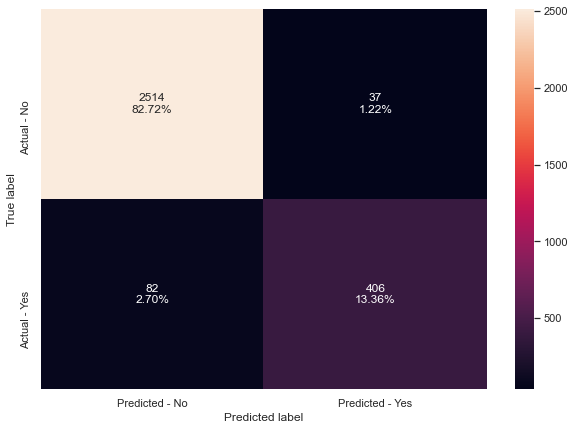

In [194]:
# Calculating different metrics
get_metrics_score(adaboost_random_tuned)

# Creating confusion matrix
make_confusion_matrix(adaboost_random_tuned, ytest)

# random Search gradientboost

In [196]:
random_gboost = RandomizedSearchCV(pipe_gradientboost, parameters_gb, n_iter=samples)
random_gboost.fit(xtrain, ytrain) 

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('gradientboostingclassifier',
                                              GradientBoostingClassifier(random_state=1))]),
                   param_distributions={'gradientboostingclassifier__max_depth': [3,
                                                                                  5,
                                                                                  10],
                                        'gradientboostingclassifier__max_features': [0.7,
                                                                                     0.8,
                                                                                     1],
                                        'gradientboostingclassifier__n_estimators': array([ 50,  75, 100, 125, 150, 175]),
                                        'gradientboos

In [197]:
print("Best parameters are {} with CV score={}:" .format(random_gboost.best_params_,random_gboost.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 0.8, 'gradientboostingclassifier__n_estimators': 125, 'gradientboostingclassifier__max_features': 0.7, 'gradientboostingclassifier__max_depth': 5} with CV score=0.9678312810492777:


In [207]:
# Creating new pipeline with best parameters
gradiantboost_random_tuned = make_pipeline(StandardScaler(),GradientBoostingClassifier
                                          (random_state=1, n_estimators=125,subsample= 0.8,
                                           max_features= 0.7, max_depth= 5 ))
# Fit the model on training data
gradiantboost_random_tuned.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, max_features=0.7,
                                            n_estimators=125, random_state=1,
                                            subsample=0.8))])

Accuracy on training set :  0.9961907449209932
Accuracy on test set :  0.9743336623889437
Recall on training set :  0.9824407374890255
Recall on test set :  0.8913934426229508
Precision on training set :  0.9937833037300178
Precision on test set :  0.9456521739130435


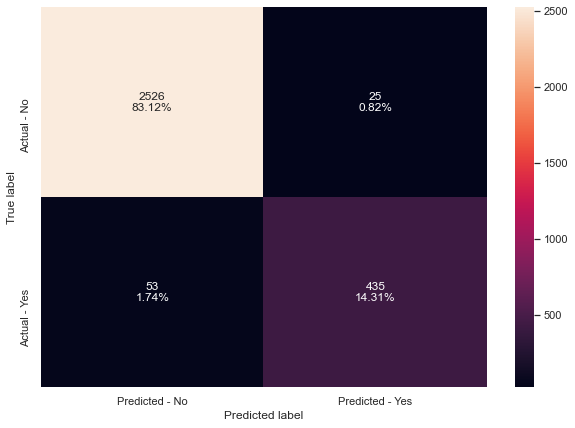

In [208]:
# Calculating different metrics
get_metrics_score(gradiantboost_random_tuned)

# Creating confusion matrix
make_confusion_matrix(gradiantboost_random_tuned, ytest)

# random Search xgboost

In [210]:
random_xgboost = RandomizedSearchCV(pipe_xgboost, parameters_xb, n_iter=samples)
random_xgboost.fit(xtrain, ytrain) 

[13:49:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:49:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:49:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:49:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0, gpu_id=-1,
                                                            importance_type='gain',
                                                            interaction_constraints='',
                                                            learning_rate=0.300000012,
                                                            max_delta_step

In [211]:
print("Best parameters are {} with CV score={}:" .format(random_xgboost.best_params_,random_xgboost.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__gamma': 3, 'xgbclassifier__colsample_bytree': 0.9, 'xgbclassifier__colsample_bylevel': 0.7} with CV score=0.967408348952325:


In [216]:
# Creating new pipeline with best parameters
xgboost_random_tuned = make_pipeline(StandardScaler(),XGBClassifier
                                          (random_state=1, n_estimators=100,subsample= 0.9, gamma= 3,
                                           olsample_bytree= 0.9, 
                                          colsample_bylevel= 0.7))
# Fit the model on training data
xgboost_random_tuned.fit(xtrain, ytrain)

[13:52:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { olsample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:52:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.7, colsample_bynode=1,
                               colsample_bytree=1, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1,
                               olsample_bytree=0.9, random_state=1, reg_alpha=0,
                               reg_lambda=1, scale_pos_weight=1, subsample=0.9,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

Accuracy on training set :  0.9923814898419865
Accuracy on test set :  0.9733464955577492
Recall on training set :  0.971027216856892
Recall on test set :  0.9016393442622951
Precision on training set :  0.9813664596273292
Precision on test set :  0.9302325581395349


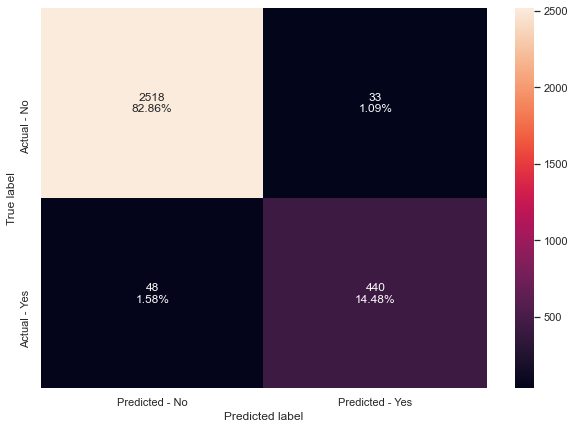

In [217]:
# Calculating different metrics
get_metrics_score(xgboost_random_tuned)

# Creating confusion matrix
make_confusion_matrix(xgboost_random_tuned, ytest)

## VIII) Model Performances
- Compare the model performance of all the models - Comment on the time taken by the grid and randomized search in optimization

## Comment on time 

Random search is way faster than Grid Search. I had to limit the number of (hyper)parameters to search for
in GridSearch as it was not possible to deliver on time. Hence Random Search is way much workable. Also in terms of the results, Random Search has results which are not worse than GridSearch, making it a better option overall

## Compare the performances of all models

In [261]:
# defining list of models
models = [dt_grid_tuned, dt_random_tuned, 
          bagging_random_tuned, bagging_grid_tuned, 
          randomforest_grid_tuned,randomforest_random_tuned,
          adaboost_grid_tuned, adaboost_random_tuned, 
          gradientboost_grid_tuned, gradiantboost_random_tuned,
          xgboost_grid_tuned, xgboost_random_tuned,    
         ]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [262]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision tree tuned with GridSearchCV",
            "Decision tree tuned with RandomizedSearchCV",
            "Bagging tuned with GridSearchCV",
            "Bagging tuned with RandomizedSearchCV", 
           "RandomForest tree tuned with GridSearchCV",
            "RandomForest tree tuned with RandomizedSearchCV",            
            "Adaboost tuned with GridSearchCV",
            "Adaboost tuned with RandomizedSearchCV", 
            "Gradiantboost tuned with GridSearchCV",
            "Gradiantboost tuned with RandomizedSearchCV",             
            "XGBoost tuned with GridSearchCV",
            "XGBoost tuned with RandomizedSearchCV",
                ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
10,XGBoost tuned with GridSearchCV,0.994074,0.972030,0.975417,0.903689,0.987556,0.920668
11,XGBoost tuned with RandomizedSearchCV,0.992381,0.973346,0.971027,0.901639,0.981366,0.930233
8,Gradiantboost tuned with GridSearchCV,0.999153,0.972688,0.996488,0.893443,0.998241,0.933619
9,Gradiantboost tuned with RandomizedSearchCV,0.996191,0.974334,0.982441,0.891393,0.993783,0.945652
6,Adaboost tuned with GridSearchCV,0.964588,0.963475,0.864794,0.877049,0.910351,0.893528
3,Bagging tuned with RandomizedSearchCV,0.999577,0.965449,0.997366,0.870902,1.000000,0.910064
7,Adaboost tuned with RandomizedSearchCV,0.962049,0.960842,0.834943,0.831967,0.921512,0.916479
2,Bagging tuned with GridSearchCV,0.999718,0.964462,0.998244,0.827869,1.000000,0.943925
4,RandomForest tree tuned with GridSearchCV,0.983070,0.957223,0.915716,0.809426,0.977507,0.914352
0,Decision tree tuned with GridSearchCV,0.954430,0.943731,0.805970,0.803279,0.900000,0.839400


Based on recall, the best performance is provided by XG boose with grid and random search with 90% recall and high precision (92 to 93%). The randomsearch version of XG boost has the advantage of being much faster to execute and provide slightly higher precision. 

Close is gradiant boost and adaboost, 


# Features importance of 2 winning models

In [264]:
# XG boost tuned grid search

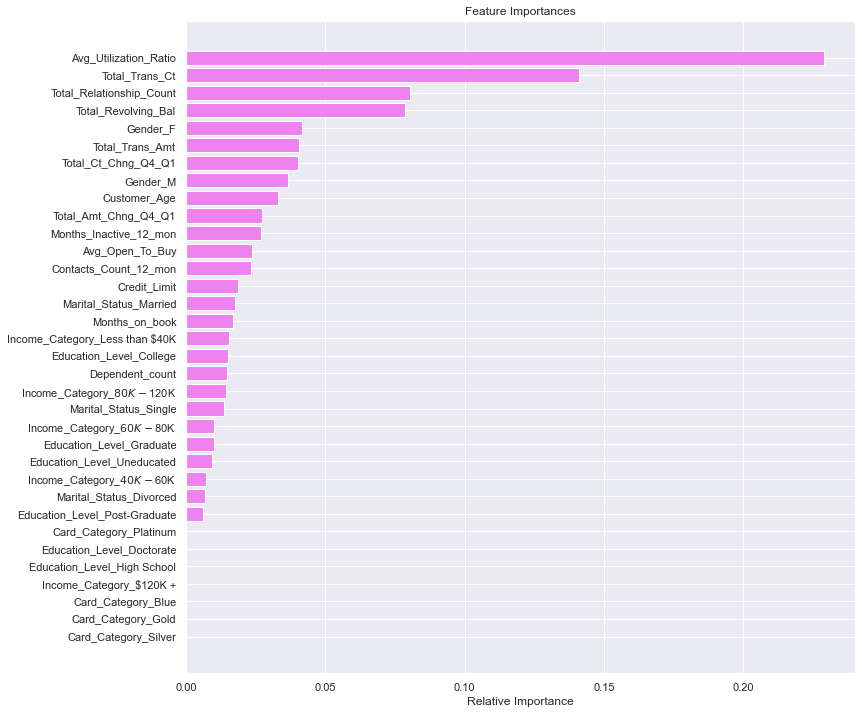

In [263]:
feature_names = xtrain.columns
importances = xgboost_grid_tuned[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Top feature is average utilisation rate (by far) followed by transaction counts. 
Relationship count, revolving balance and gender also in top 5

In [265]:
# XG boost randomized search

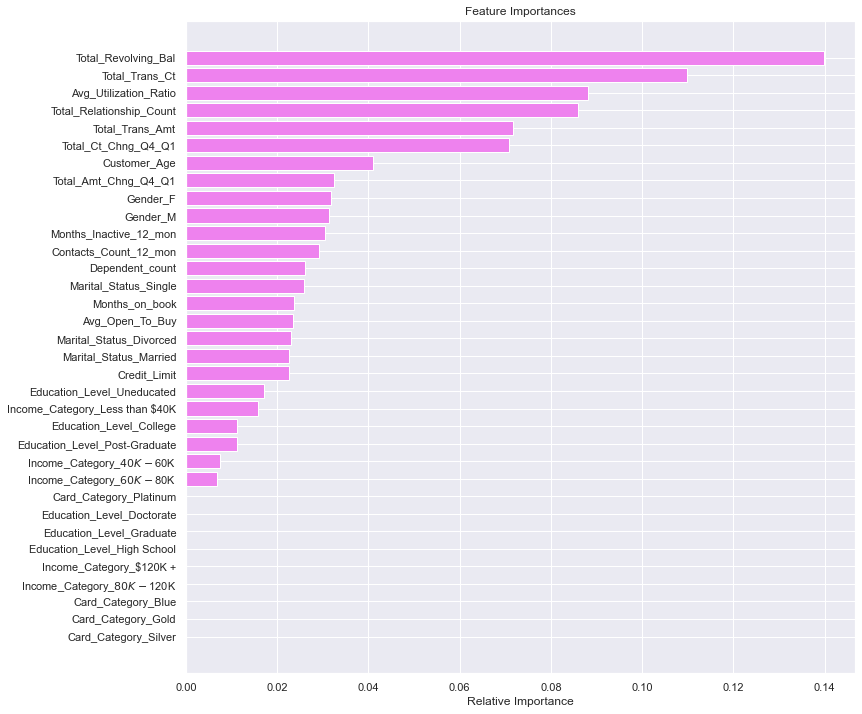

In [266]:
feature_names = xtrain.columns
importances = xgboost_random_tuned[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Top features of the randomized version of XG boost are the total revolving balance, total transaction counts, average utilisation ratio and total relationship counts.

## IX) 5 points 
Actionable Insights & Recommendations
- Business recommendations and insights



We recommend the utilisation of XGBoost to predict client churning. Both grid and randomized version produces equivalent results in terms of recall, which is the main focus.

Both model offers a quite decent recall rate (90%) and precision (92%+) which suggests possible utilisation for the purpose of identifying the potentially churning customer while minimizing the cost of action of the Bank by targeting the right targets.  

Both models place the following features as top 4 of the variables to predict if a client is going to churn:
- total revolving balance
- total transaction counts
- average utilisation ratio
- total relationship counts

Consequently, we suggest to use those data and models to make "early signals" and detect customer on their way to churn and take appropriate actions.

Other actions could include:
- having a more personalised (for instance, with gender based or bank relationship length's approach since female customers are the larger pool and seem to have above average churning tendancy than male).
- work on the credit card offering since very few clients have more than a blue card (minimum offering).
- since the churning rate seems higher with those having better quality credit card, working on the benefits offered by those credit cards and maybe reducing the costs of holding higher quality credit card should also be explored. 
